# Confronto tra Insertion Sort e Counting Sort
## Matteo Lotti
### Marzo-Aprile 2023

In questo notebook ci poniamo l'obiettivo di impostare e effettuare un confronto tra due algoritmi di ordinamento. In particolare, i due algoritmi in questione saranno:

- __Insertion Sort__

- __Counting Sort__

Il notebook sarà sviluppato in questo modo:

1. Nelle celle successive saranno presenti le implementazioni dei due algoritmi seguiti rispettivamente da una breve spiegazione messa in relazione con le evidenze teoriche conosciute.

2. Successivamente sarà presente una cella nella quale sarà implementata la funzione di test, seguita da un'opportuna spiegazione del codice e dei test che saranno eseguiti

3. In questa fase saranno effettuati e descritti i dovuti test e i rispettivi risultati

4. Nella chiusura tireremo le somme dei risultati ottenuti dagli esperimenti svolti

In [62]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr


In [63]:
def counting_sort(arr):
    max_element = max(arr) #k
    count_array = [0] * (max_element + 1) #primo for

    for element in arr:
        count_array[element] += 1

    for i in range(1, len(count_array)):
        count_array[i] += count_array[i-1]

    sorted_array = [0] * len(arr)
    for element in reversed(arr):
        sorted_array[count_array[element]-1] = element #-1 perché indicizzazione parte da 0
        count_array[element] -= 1

    return sorted_array


In [64]:
import random
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import numpy as np

def test(rand, N, r, s, ins, cou, title, rev = False):

    insertion_sort_times = []
    counting_sort_times = []


    i=s

    while i<N:
        if rand:
            arr = [random.randint(0, r) for _ in range(i)]
        else:
            arr = np.arange(i)
        if rev:
            arr = arr[::-1]

        arr2 = np.copy(arr)

        start = timer()
        insertion_sort(arr) #probably not necessary
        end = timer()
        insertion_sort_times.append(end-start)

        start = timer()
        counting_sort(arr2)
        end = timer()
        counting_sort_times.append(end-start)


    
        i+=s

    if ins:
        plt.plot(range(s,N,s), insertion_sort_times, label="Insertion Sort")
    if cou:
        plt.plot(range(s,N,s), counting_sort_times, label="Counting Sort")
    plt.xlabel("Input Size")
    plt.ylabel("Time (seconds)")
    plt.title(title)
    plt.legend()
    plt.show()


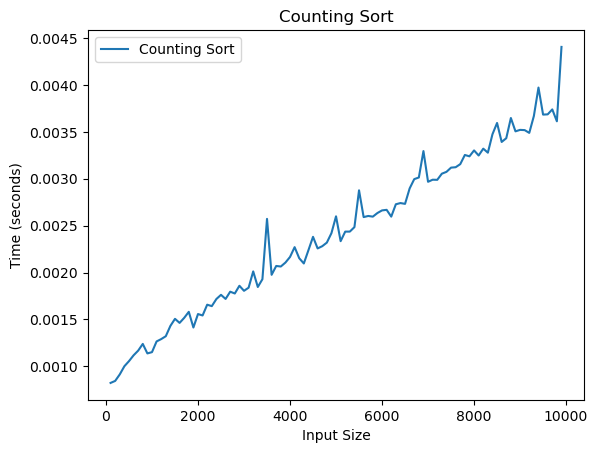

In [65]:
test(True, 10000, 10000, 100, False, True, "Counting Sort")